<a href="https://colab.research.google.com/github/EighteenSprings/BaiduPaperReproduction2end/blob/main/DeblurGANv2_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeblurGANv2
https://github.com/VITA-Group/DeblurGANv2

In [1]:
# git clone
!git clone https://github.com/VITA-Group/DeblurGANv2.git

Cloning into 'DeblurGANv2'...
remote: Enumerating objects: 817, done.
remote: Total 817 (delta 0), reused 0 (delta 0), pack-reused 817
Receiving objects: 100% (817/817), 61.78 MiB | 26.21 MiB/s, done.
Resolving deltas: 100% (427/427), done.


In [23]:
# instal gdown for datasets and pretrained model
!pip install gdown

In [24]:
# define gdownloader function
import os
from gdown import download as drive_download

def gdownloader(gdrive_url, save_path, gdrive_filename):
    try:
        if not os.path.exists(save_path):
            os.mkdir(save_path)
        file_path = os.path.join(save_path,gdrive_filename)
        drive_download(gdrive_url, file_path, quiet=False)
        print("Done!")
    except Exception:
        print('Error')

In [4]:
# mount google drive
!unrar l /content/drive/MyDrive/GAN/DeblurGANv2/GOPRO.rar >content.txt

In [1]:
# view content.txt info
!head -n 10 content.txt


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Archive: /content/drive/MyDrive/GAN/DeblurGANv2/GOPRO.rar
Details: RAR 4

 Attributes      Size     Date    Time   Name
----------- ---------  ---------- -----  ----
    ..A..H.       136  2019-08-05 08:52  GOPRO/desktop.ini
    ..A..H.       136  2019-08-05 08:53  GOPRO/GOPRO_3840FPS_AVG_3-21/desktop.ini


In [2]:
# get datainfo
data = []
with open('content.txt', 'r') as f:
  for line in f:
    info = line.strip().split(' ')
    if len(info) > 0:
      if 'GOPRO' in info[-1] and info[-1].endswith('.png'):
        data.append(info[-1])
print(f'Numbers of data:{len(data)}')

Numbers of data:13200


In [3]:
data[:10]

['GOPRO/GOPRO_3840FPS_AVG_3-21/test/blur/GOPR0384_11_00/000144_19.png',
 'GOPRO/GOPRO_3840FPS_AVG_3-21/test/blur/GOPR0384_11_00/000174_5.png',
 'GOPRO/GOPRO_3840FPS_AVG_3-21/test/blur/GOPR0384_11_00/000261_15.png',
 'GOPRO/GOPRO_3840FPS_AVG_3-21/test/blur/GOPR0384_11_00/000348_11.png',
 'GOPRO/GOPRO_3840FPS_AVG_3-21/test/blur/GOPR0384_11_00/000435_21.png',
 'GOPRO/GOPRO_3840FPS_AVG_3-21/test/blur/GOPR0384_11_00/000522_13.png',
 'GOPRO/GOPRO_3840FPS_AVG_3-21/test/blur/GOPR0384_11_00/000609_15.png',
 'GOPRO/GOPRO_3840FPS_AVG_3-21/test/blur/GOPR0384_11_00/000696_3.png',
 'GOPRO/GOPRO_3840FPS_AVG_3-21/test/blur/GOPR0384_11_00/000783_9.png',
 'GOPRO/GOPRO_3840FPS_AVG_3-21/test/blur/GOPR0384_11_00/000870_13.png']

In [7]:
data_000144 = [x for x in data if "GOPR0384_11_00/000144" in x]
print(f'data_000144:{len(data_000144)}')

data_000144:2


In [8]:
for x in data_000144:
  print(x)

GOPRO/GOPRO_3840FPS_AVG_3-21/test/blur/GOPR0384_11_00/000144_19.png
GOPRO/GOPRO_3840FPS_AVG_3-21/test/sharp/GOPR0384_11_00/000144_19.png


In [10]:
import os
rar_dir = "/content/drive/MyDrive/GAN/DeblurGANv2/GOPRO.rar"
if not os.path.exists('data'):
  os.mkdir('data')
if not os.path.exists('data/blur'):
  os.mkdir('data/blur')
if not os.path.exists('data/sharp'):
  os.mkdir('data/sharp')
for file_pth in data_000144:
  if 'sharp' in file_pth:
    os.system(f'unrar e {rar_dir} {file_pth} -x data/sharp')
  elif 'blur' in file_pth:
    os.system(f'unrar e {rar_dir} {file_pth} -x data/blur')
  else:
    print(f'{file_pth} not in condition')
print("Done!")
print(os.listdir("data"))
print(os.listdir("data/blur"))
print(os.listdir("data/sharp"))

Done!
['blur', 'sharp']
['000144_19.png']
['000144_19.png']


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 1279.5, 719.5, -0.5)

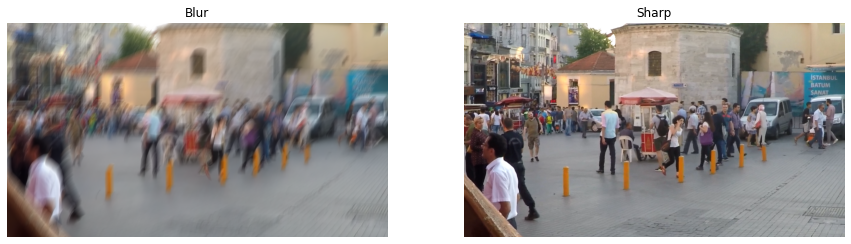

In [20]:
im_blur = plt.imread('data/blur/000144_19.png')
im_sharp = plt.imread("data/sharp/000144_19.png")
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(im_blur)
ax[0].set_title("Blur")
ax[0].axis("off")
ax[1].imshow(im_sharp)
ax[1].set_title("Sharp")
ax[1].axis("off")

In [22]:
# download pretrained model
pretrained_model = {
    "InceptionResNet-v2":{
        "url": "https://drive.google.com/uc?id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR",
        "filename":"fpn_inception.h5"
    }
}
InceptionResNetV2 = pretrained_model['InceptionResNet-v2']

In [25]:
gdownloader(InceptionResNetV2["url"], "model", InceptionResNetV2["filename"])

Downloading...
From: https://drive.google.com/uc?id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR
To: /content/model/fpn_inception.h5
244MB [00:07, 30.7MB/s]


Done!


In [31]:
!pip install fire pretrainedmodels

     |████████████████████████████████| 92kB 5.0MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=f716d502e59549d00a91601ae9546eb503f6f1de3f801c843347b5327e9fb900
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp37-none-any.whl size=60963 sha256=3e609ad0a1809ea946950d89523506016abf9e43e2f4455f6d1da4df7ddf6d39
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built fire pretrainedmodels


因为要运行在 CPU， 所以 predict.py 有几个部分要修改  
line 21:
```python
model.load_state_dict(torch.load(weights_path, map_location=torch.device("cpu"))['model'])
# self.model = model.cuda()
self.model = model
```
  
line 66
```python
# inputs = [img.cuda()]
inputs = [img]
```

In [35]:
%cd DeblurGANv2
!python predict.py --weights_path /content/model/fpn_inception.h5 /content/data/blur/000144_19.png
%cd ..

/content/DeblurGANv2
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3328: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
100% 1/1 [00:11<00:00, 11.53s/it]
/content


(-0.5, 1279.5, 719.5, -0.5)

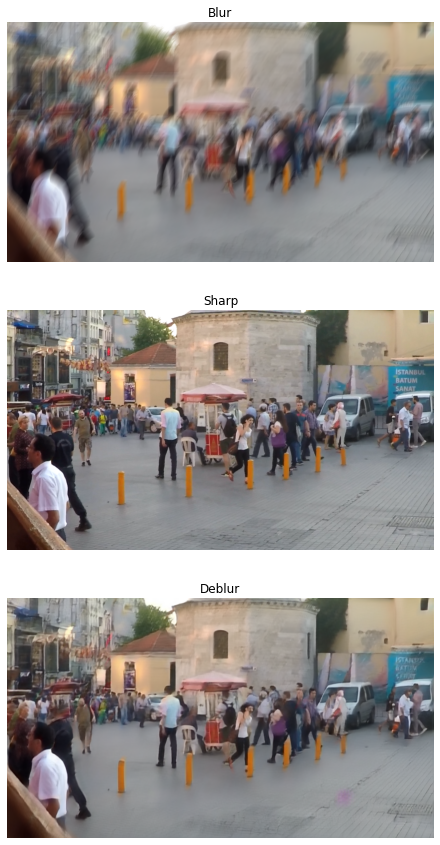

In [36]:
# /content/DeblurGANv2/submit/000144_19.png
im_blur = plt.imread('data/blur/000144_19.png')
im_sharp = plt.imread("data/sharp/000144_19.png")
im_deblur = plt.imread("DeblurGANv2/submit/000144_19.png")
fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(im_blur)
ax[0].set_title("Blur")
ax[0].axis("off")
ax[1].imshow(im_sharp)
ax[1].set_title("Sharp")
ax[1].axis("off")
ax[2].imshow(im_deblur)
ax[2].set_title("Deblur")
ax[2].axis("off")